## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.943190  1.319213  0.334391 -0.984591  1.274102  0.122364
1  0.488039 -0.906821 -1.139117 -1.316935 -0.164343 -0.896557
2 -1.325219  0.414588 -0.572506 -0.623389 -1.303635 -1.725423
3  0.307458 -1.398979 -1.233333 -1.486134  1.476038 -1.026642
4 -1.496414 -1.292496  0.546385  0.008879 -1.263504 -1.551732


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0025179	total: 58ms	remaining: 58s
1:	learn: 0.9920194	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9813980	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9706201	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9621558	total: 60.1ms	remaining: 12s
5:	learn: 0.9525165	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9396873	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9302982	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9210209	total: 62.3ms	remaining: 6.86s
9:	learn: 0.9127305	total: 62.9ms	remaining: 6.22s
10:	learn: 0.9036495	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8936024	total: 64ms	remaining: 5.27s
12:	learn: 0.8849597	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8765710	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8680496	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8605917	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8515702	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8438558	total: 66.8ms	remaining: 3.65s
18:	learn: 0.8370258	total: 67.3ms	remaining: 3.48s


107:	learn: 0.3704538	total: 109ms	remaining: 904ms
108:	learn: 0.3674734	total: 110ms	remaining: 900ms
109:	learn: 0.3641782	total: 111ms	remaining: 895ms
110:	learn: 0.3610820	total: 111ms	remaining: 890ms
111:	learn: 0.3585740	total: 112ms	remaining: 885ms
112:	learn: 0.3562981	total: 112ms	remaining: 879ms
113:	learn: 0.3532080	total: 112ms	remaining: 873ms
114:	learn: 0.3502971	total: 113ms	remaining: 869ms
115:	learn: 0.3479995	total: 113ms	remaining: 865ms
116:	learn: 0.3454222	total: 114ms	remaining: 860ms
117:	learn: 0.3429126	total: 115ms	remaining: 856ms
118:	learn: 0.3394888	total: 115ms	remaining: 851ms
119:	learn: 0.3369924	total: 116ms	remaining: 847ms
120:	learn: 0.3347431	total: 116ms	remaining: 843ms
121:	learn: 0.3326408	total: 117ms	remaining: 839ms
122:	learn: 0.3296877	total: 117ms	remaining: 834ms
123:	learn: 0.3271229	total: 118ms	remaining: 830ms
124:	learn: 0.3247706	total: 118ms	remaining: 827ms
125:	learn: 0.3221338	total: 119ms	remaining: 822ms
126:	learn: 

268:	learn: 0.1300014	total: 187ms	remaining: 508ms
269:	learn: 0.1298021	total: 188ms	remaining: 507ms
270:	learn: 0.1289277	total: 188ms	remaining: 506ms
271:	learn: 0.1287312	total: 188ms	remaining: 504ms
272:	learn: 0.1279533	total: 189ms	remaining: 503ms
273:	learn: 0.1274145	total: 189ms	remaining: 501ms
274:	learn: 0.1272222	total: 190ms	remaining: 500ms
275:	learn: 0.1270166	total: 190ms	remaining: 499ms
276:	learn: 0.1261208	total: 191ms	remaining: 498ms
277:	learn: 0.1252511	total: 191ms	remaining: 496ms
278:	learn: 0.1249367	total: 192ms	remaining: 495ms
279:	learn: 0.1247513	total: 192ms	remaining: 494ms
280:	learn: 0.1237776	total: 193ms	remaining: 493ms
281:	learn: 0.1235959	total: 193ms	remaining: 491ms
282:	learn: 0.1227270	total: 193ms	remaining: 490ms
283:	learn: 0.1218476	total: 194ms	remaining: 489ms
284:	learn: 0.1216184	total: 194ms	remaining: 488ms
285:	learn: 0.1214453	total: 196ms	remaining: 488ms
286:	learn: 0.1204949	total: 196ms	remaining: 487ms
287:	learn: 

493:	learn: 0.0405121	total: 293ms	remaining: 300ms
494:	learn: 0.0402842	total: 294ms	remaining: 300ms
495:	learn: 0.0400211	total: 294ms	remaining: 299ms
496:	learn: 0.0397985	total: 294ms	remaining: 298ms
497:	learn: 0.0395430	total: 295ms	remaining: 297ms
498:	learn: 0.0392272	total: 295ms	remaining: 297ms
499:	learn: 0.0390142	total: 296ms	remaining: 296ms
500:	learn: 0.0388068	total: 296ms	remaining: 295ms
501:	learn: 0.0386859	total: 297ms	remaining: 294ms
502:	learn: 0.0383824	total: 297ms	remaining: 294ms
503:	learn: 0.0381836	total: 298ms	remaining: 293ms
504:	learn: 0.0380661	total: 298ms	remaining: 292ms
505:	learn: 0.0378738	total: 299ms	remaining: 291ms
506:	learn: 0.0376785	total: 299ms	remaining: 291ms
507:	learn: 0.0375380	total: 299ms	remaining: 290ms
508:	learn: 0.0372863	total: 300ms	remaining: 289ms
509:	learn: 0.0371496	total: 300ms	remaining: 288ms
510:	learn: 0.0370155	total: 301ms	remaining: 288ms
511:	learn: 0.0367298	total: 301ms	remaining: 287ms
512:	learn: 

658:	learn: 0.0180245	total: 370ms	remaining: 191ms
659:	learn: 0.0179709	total: 371ms	remaining: 191ms
660:	learn: 0.0179182	total: 371ms	remaining: 190ms
661:	learn: 0.0178761	total: 371ms	remaining: 190ms
662:	learn: 0.0178242	total: 372ms	remaining: 189ms
663:	learn: 0.0177396	total: 372ms	remaining: 188ms
664:	learn: 0.0176855	total: 373ms	remaining: 188ms
665:	learn: 0.0175844	total: 373ms	remaining: 187ms
666:	learn: 0.0175438	total: 374ms	remaining: 186ms
667:	learn: 0.0174934	total: 374ms	remaining: 186ms
668:	learn: 0.0173946	total: 374ms	remaining: 185ms
669:	learn: 0.0173398	total: 375ms	remaining: 184ms
670:	learn: 0.0172419	total: 375ms	remaining: 184ms
671:	learn: 0.0171907	total: 376ms	remaining: 183ms
672:	learn: 0.0171124	total: 376ms	remaining: 183ms
673:	learn: 0.0170446	total: 376ms	remaining: 182ms
674:	learn: 0.0169782	total: 377ms	remaining: 181ms
675:	learn: 0.0169021	total: 377ms	remaining: 181ms
676:	learn: 0.0168375	total: 378ms	remaining: 180ms
677:	learn: 

883:	learn: 0.0089203	total: 477ms	remaining: 62.5ms
884:	learn: 0.0089160	total: 477ms	remaining: 62ms
885:	learn: 0.0088949	total: 478ms	remaining: 61.4ms
886:	learn: 0.0088640	total: 478ms	remaining: 60.9ms
887:	learn: 0.0088493	total: 479ms	remaining: 60.4ms
888:	learn: 0.0088286	total: 479ms	remaining: 59.8ms
889:	learn: 0.0087941	total: 479ms	remaining: 59.3ms
890:	learn: 0.0087701	total: 480ms	remaining: 58.7ms
891:	learn: 0.0087417	total: 480ms	remaining: 58.2ms
892:	learn: 0.0087215	total: 481ms	remaining: 57.6ms
893:	learn: 0.0086983	total: 481ms	remaining: 57.1ms
894:	learn: 0.0086785	total: 482ms	remaining: 56.5ms
895:	learn: 0.0086743	total: 483ms	remaining: 56ms
896:	learn: 0.0086681	total: 483ms	remaining: 55.5ms
897:	learn: 0.0086486	total: 484ms	remaining: 54.9ms
898:	learn: 0.0086445	total: 484ms	remaining: 54.4ms
899:	learn: 0.0086404	total: 485ms	remaining: 53.8ms
900:	learn: 0.0086212	total: 485ms	remaining: 53.3ms
901:	learn: 0.0086069	total: 485ms	remaining: 52.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

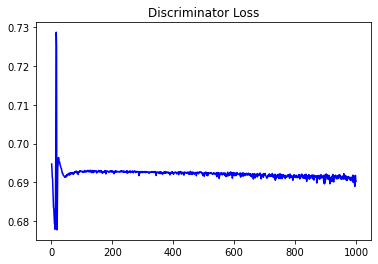

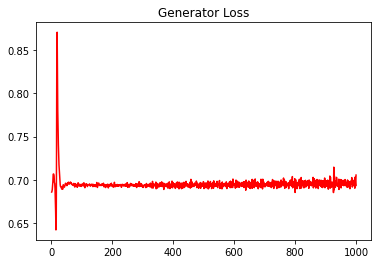

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08743433795546719


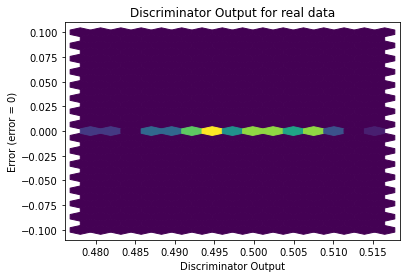

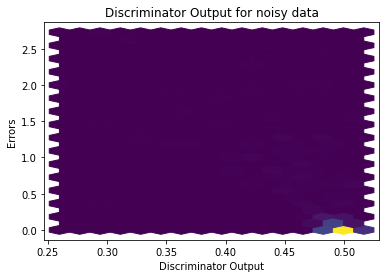

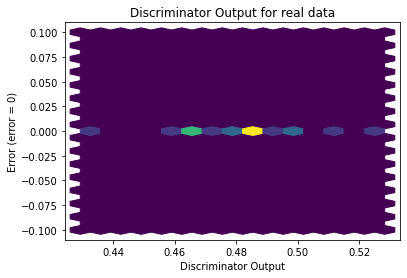

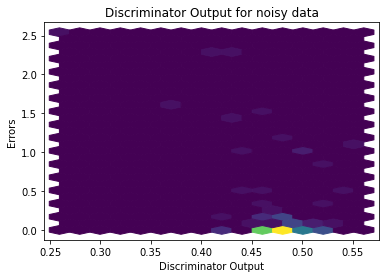

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


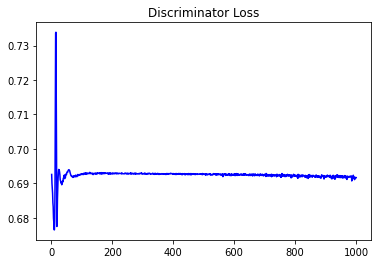

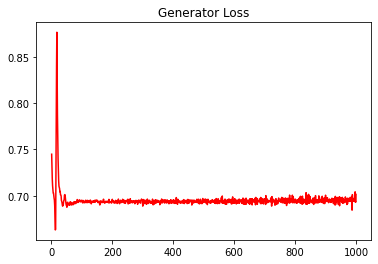

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1376115264141862


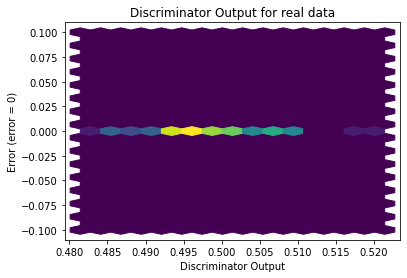

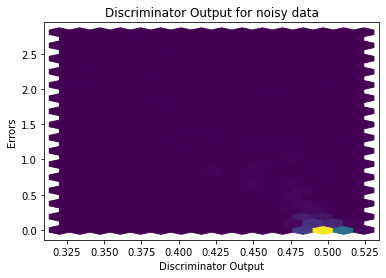

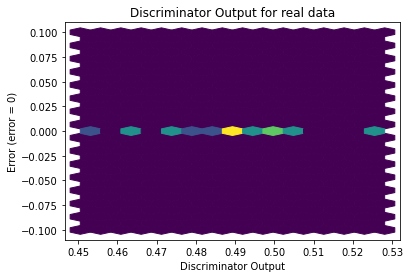

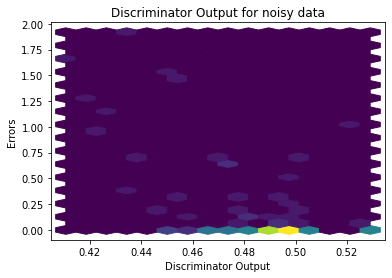

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6873]], requires_grad=True)
